In [10]:
import scipy.stats as scs
import pandas as pd
import numpy as np
from module.data_generator import *
import matplotlib.pyplot as plt

In [2]:
# generating fake CTR data
n_A = 1000
n_B = 1000

CR_A = 0.10
CR_B = 0.12

In [3]:
ab_test = generate_data(n_A, n_B, CR_A, CR_B)

ab_test

,group,converted
0,A,0
1,A,1
2,B,0
3,B,0
4,B,0
...,...,...
1995,A,0
1996,A,0
1997,A,0
1998,A,1


In [4]:
ab_summary  = pd.pivot_table(data  = ab_test,
                                  values = 'converted',
                                  index  = 'group',
                                 aggfunc = np.sum)

In [5]:
#adding converted to the pivot table
ab_summary['total'] = ab_test.pivot_table(values="converted",
                                         index = "group",
                                         aggfunc = lambda x:len(x))
ab_summary['rate'] = ab_test.pivot_table(values="converted",
                                        index="group")

In [6]:
ab_summary

,converted,total,rate
group,,,
A,100,1018,0.098232
B,129,982,0.131365


In [13]:
ab_summary['converted']['A']

100

AttributeError: 'AxesSubplot' object has no attribute 'avline'

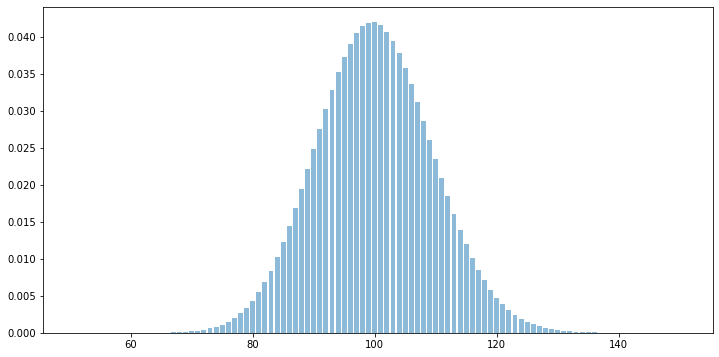

In [17]:
fig, ax = plt.subplots(figsize=(12,6))

x = np.linspace(ab_summary['converted']['A']-49, ab_summary['converted']['A']+50, 100)
y = scs.binom(ab_summary['total']['A'], ab_summary['rate']['A']).pmf(x)
ax.bar(x,y,alpha=0.5)
ax.avline(x=ab_summary['rate']['B'] * ab_summary['total']['A'], c='blue', alpha=0.74, linestyle='--')
plt.xlabel('converted')
plt.ylabel('probability')